<a href="https://colab.research.google.com/github/Buggermenot/TimeSeries-Labs23/blob/main/AI_Assignment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI Assignment 9 - Tanmay Verma (E21CSEU0906)

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score

In [3]:
diabetes = datasets.load_diabetes()

print("Diabetes dataset description:")
print(diabetes.DESCR)
# print(diabetes)

Diabetes dataset description:
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood suga

In [4]:
X = diabetes.data
y = diabetes.target
print("X shape:", X.shape)
print("y shape:", y.shape)

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X shape: (442, 10)
y shape: (442,)


## Task 1

### Linear Regression


In [6]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
print("R2 score for Linear Regression:", r2_linear)

R2 score for Linear Regression: 0.4526027629719195


### Ridge Regression (alpha=0.01)

In [7]:
ridge_reg = Ridge(alpha=0.01)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("R2 score for Ridge Regression:", r2_ridge)

R2 score for Ridge Regression: 0.4559819504579109


### Lasso Regression (alpha=0.01)

In [8]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("R2 score for Lasso Regression:", r2_lasso)

R2 score for Lasso Regression: 0.45668611945806237


### Elastic net (alpha=0.05, l1_ratio=0.9)

In [9]:
elastic_net = ElasticNet(alpha=0.05, l1_ratio=0.9)
elastic_net.fit(X_train, y_train)
y_pred_elastic = elastic_net.predict(X_test)
r2_elastic = r2_score(y_test, y_pred_elastic)
print("R2 score for Elastic Net:", r2_elastic)

R2 score for Elastic Net: 0.36901797675961023


## Task 2

In [13]:
alpha_values = [0, 1, 10]
# alpha_values = list(range(11))

ridge_coefficients = []
ridge_r2 = []
lasso_coefficients = []
lasso_r2 = []

for alpha in alpha_values:
    # Ridge Regression
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    ridge_coefficients.append(ridge_reg.coef_)
    y_pred_ridge = ridge_reg.predict(X_test)
    ridge_r2.append(r2_score(y_test, y_pred_ridge))


    # Lasso Regression
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)
    lasso_coefficients.append(lasso_reg.coef_)
    y_pred_lasso = lasso_reg.predict(X_test)
    lasso_r2.append(r2_score(y_test, y_pred_lasso))

<ipython-input-13-108ac5b38b58>:20: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_reg.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e+05, tolerance: 2.145e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


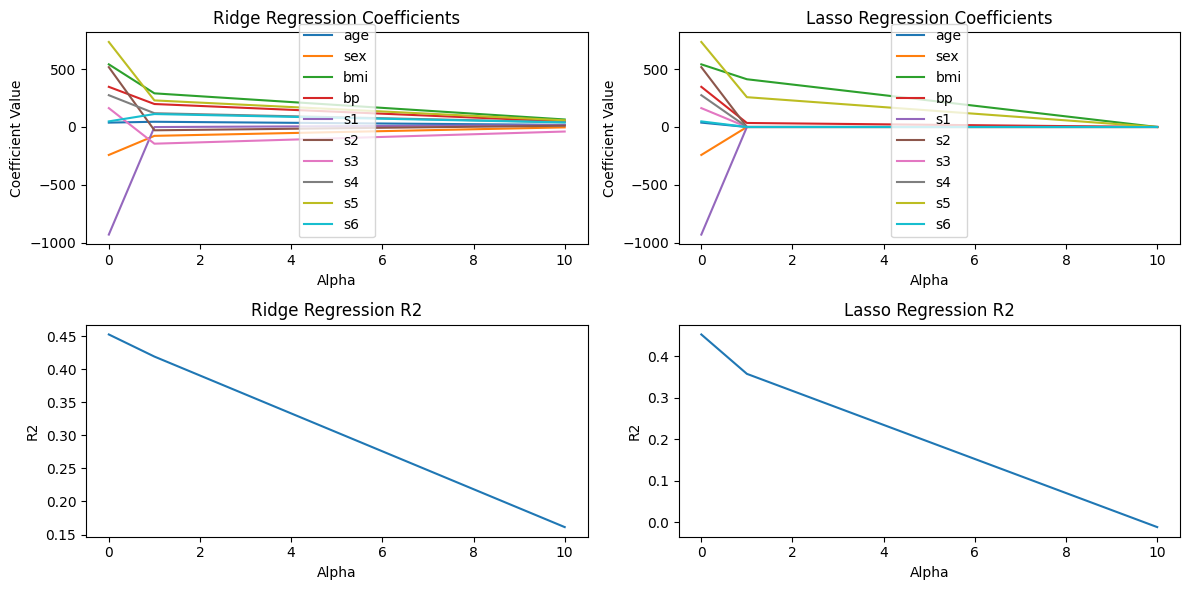

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(alpha_values, ridge_coefficients)
plt.title("Ridge Regression Coefficients")
plt.xlabel("Alpha")
plt.ylabel("Coefficient Value")
plt.legend(diabetes.feature_names)

plt.subplot(2, 2, 2)
plt.plot(alpha_values, lasso_coefficients)
plt.title("Lasso Regression Coefficients")
plt.xlabel("Alpha")
plt.ylabel("Coefficient Value")
plt.legend(diabetes.feature_names)

plt.subplot(2, 2, 3)
plt.plot(alpha_values, ridge_r2)
plt.title("Ridge Regression R2")
plt.xlabel("Alpha")
plt.ylabel("R2")

plt.subplot(2, 2, 4)
plt.plot(alpha_values, lasso_r2)
plt.title("Lasso Regression R2")
plt.xlabel("Alpha")
plt.ylabel("R2")

plt.tight_layout()
plt.show()